In [42]:
# imports necessary libraries

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [43]:
engine = create_engine("sqlite:///C:\\Users\\samantha.ettinger\\GWU-ARL-DATA-PT-12-2019-U-C\\02-Homework\\10-Advanced-Data-Storage-and-Retrieval\\Instructions\\Resources\\hawaii.sqlite")

In [44]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [45]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [46]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [47]:
Meas = Base.classes.measurement

In [48]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [49]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

    
# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

In [50]:
# Retrieve the last 12 months of precipitation data
max_date=session.query(Meas.date).order_by(Meas.date.desc()).first()
print(max_date)

('2017-08-23',)


In [51]:
#calculate the date 1 year go from the last data point in the database
year_to_date=dt.date(2017, 8, 23) -pd.Timedelta(days=365)

In [52]:
print(year_to_date)

2016-08-23


In [53]:
#perform  a query to retrieve the data and precipitation scores
data=session.query(Meas.prcp,Meas.date).\
    filter(Meas.date >year_to_date).all()
 

In [54]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(data, columns =['Precipitation', 'Date'])

In [55]:
setdf=df.dropna()

In [56]:
#set index to date
setdf.set_index('Date')


,Precipitation
Date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
...,...
2017-08-17,0.13
2017-08-19,0.09
2017-08-21,0.56


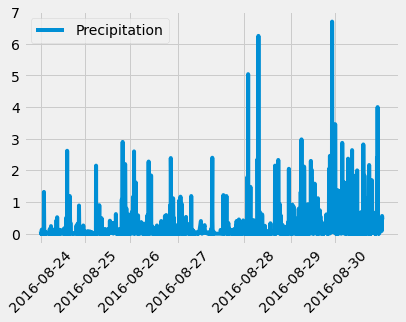

In [68]:
# Use Pandas Plotting with Matplotlib to plot the data

ax =setdf.plot(xticks=setdf.index)
ax.set_xticklabels(df["Date"]);
ax.locator_params(axis='x', nbins=7)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)


In [37]:
setdf['Precipitation']

0       0.08
1       0.08
2       0.00
3       0.00
4       0.01
        ... 
2216    0.13
2218    0.09
2220    0.56
2221    0.50
2222    0.45
Name: Precipitation, Length: 2015, dtype: float64

In [69]:
#print the summary statistics
setdf.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [70]:
# creates variable that will be called in Flask app

Stat = Base.classes.station

In [71]:
#design a query to calculate the total number of stations
st=[]
for row in session.query(Stat.station).all():
    if row not in st:
        st.append(row)
len(st)

9

In [72]:
conn = engine.connect()

In [73]:
m = pd.read_sql("SELECT * FROM measurement", conn)
m.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [74]:
p=pd.read_sql("SELECT * FROM station", conn)
p.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [75]:
# Merge the columns
combined_data = pd.merge(m, p, on="station", how="inner")

In [76]:
combined_data


,id_x,station,date,prcp,tobs,id_y,name,latitude,longitude,elevation
0,1,USC00519397,2010-01-01,0.08,65.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00519397,2010-01-02,0.00,63.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
2,3,USC00519397,2010-01-03,0.00,74.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
3,4,USC00519397,2010-01-04,0.00,76.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
4,5,USC00519397,2010-01-06,NaN,73.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
...,...,...,...,...,...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0,9,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
19546,19547,USC00516128,2017-08-20,NaN,78.0,9,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
19547,19548,USC00516128,2017-08-21,0.56,76.0,9,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
19548,19549,USC00516128,2017-08-22,0.50,76.0,9,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4


In [77]:
# sort the values by the most views

sorted_combined=combined_data.sort_values(by='tobs', ascending=False)

In [78]:
# selects only the station and tobs columns from sorted df

sort_by_desc=sorted_combined[['station','tobs']]

# gets the total views per station
sum_by_station=sort_by_desc.groupby(['station']).sum()

In [79]:
#list the stations and observation counts in descending order
sorted_combined=sum_by_station.sort_values(by='tobs',ascending=False)
sorted_combined.reset_index()

,station,tobs
0,USC00519397,203083.0
1,USC00519523,198957.0
2,USC00519281,198652.0
3,USC00513117,196915.0
4,USC00516128,185230.0
5,USC00514830,164871.0
6,USC00511918,141728.0
7,USC00517948,102467.0
8,USC00518838,37162.0


In [80]:
#station with the highest number of observations
sorted_combined.iloc[0]

tobs    203083.0
Name: USC00519397, dtype: float64

In [81]:
#retrieve the last 12 months of temperature observation data
data=session.query(Meas.tobs,Meas.date,Meas.station).\
    filter(Meas.date >year_to_date).all()

In [82]:
# selects only the necessary columns

df_3 = pd.DataFrame(data, columns =['TOBS','Date','Station'])
print(df_3)

      TOBS        Date      Station
0     79.0  2016-08-24  USC00519397
1     80.0  2016-08-25  USC00519397
2     79.0  2016-08-26  USC00519397
3     77.0  2016-08-27  USC00519397
4     78.0  2016-08-28  USC00519397
...    ...         ...          ...
2218  71.0  2017-08-19  USC00516128
2219  78.0  2017-08-20  USC00516128
2220  76.0  2017-08-21  USC00516128
2221  76.0  2017-08-22  USC00516128
2222  76.0  2017-08-23  USC00516128

[2223 rows x 3 columns]


(array([ 10.,  17.,  66.,  85., 258., 246., 290., 591., 356., 283.,  18.,
          3.]),
 array([58.        , 60.41666667, 62.83333333, 65.25      , 67.66666667,
        70.08333333, 72.5       , 74.91666667, 77.33333333, 79.75      ,
        82.16666667, 84.58333333, 87.        ]),
 <a list of 12 Patch objects>)

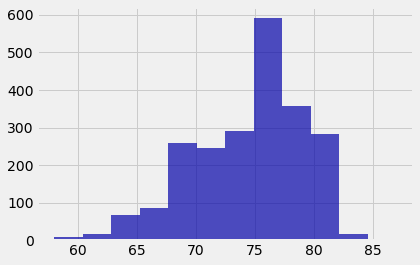

In [83]:
#plot the results to a histogram
plt.hist(x=df_3['TOBS'], bins=12, color='#0504aa',
                            alpha=0.7, rwidth=1, label='Frequency')


In [84]:
# creates variables that will be called in Flask

start=dt.date(2012,1,1)
   
max_start_data=session.query(func.max(Meas.tobs)).filter(Meas.date>=start)
avg_data=session.query(func.avg(Meas.tobs)).filter(Meas.date>=start)
min_data=session.query(func.min(Meas.tobs)).filter(Meas.date>=start)
